# tensorflowのチュートリアル1

- 基本的なクラス分類をファッションMNISTデータに対して行う
- 詳細は[コチラ](https://www.tensorflow.org/tutorials/keras/basic_classification)

In [1]:
# 必要な環境のインポート

import tensorflow as tf
from tensorflow import keras

import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'1.12.0'

In [2]:
# ファッションmnistをインストールする

fashion_mnist = keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
# データラベルを設定する

class_names = class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

60000 tain images as 28 * 28 pixels
N of train_labels: 60000
10000 test images as 28 * 28 pixels
N of test_labels: 10000


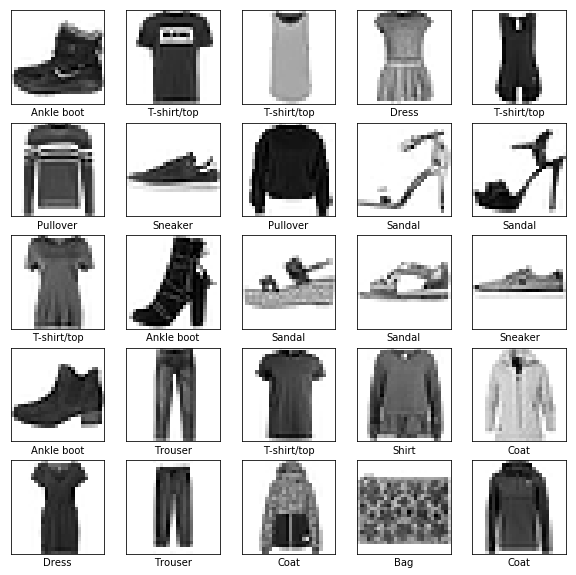

In [4]:
# データの確認

print("%s tain images as %s * %s pixels" %train_images.shape)
print("N of train_labels: %s" %len(train_labels))

print("%s test images as %s * %s pixels" %test_images.shape)
print("N of test_labels: %s" %len(test_labels))

plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])


In [5]:
# データの正規化

train_images = train_images / 255.0
test_images = test_images / 255.0

In [6]:
# モデルの設定：レイヤーの設定

model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

# Flatten: 2次元データを1次元に変換する（28*28なので1次元784データ）
# Dense(128, activation=tf.nn.relu): 全結合ordensly結合のレイヤー，128node(or neuros)を設定
# Dense(10, activation=tf.nn.softmax): softmaxレイヤー：10のprobabilityy socoreを出す

model.compile(
    optimizer=tf.train.AdamOptimizer(), 
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

e = 20
history = model.fit(train_images, train_labels, epochs=e, validation_data=(test_images, test_labels))

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 7s 124us/step - loss: 0.4969 - acc: 0.8265 - val_loss: 0.4316 - val_acc: 0.8456
Epoch 2/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.3750 - acc: 0.8656 - val_loss: 0.4181 - val_acc: 0.8445
Epoch 3/20
60000/60000 [==============================] - 4s 71us/step - loss: 0.3371 - acc: 0.8767 - val_loss: 0.3903 - val_acc: 0.8585
Epoch 4/20
60000/60000 [==============================] - 4s 73us/step - loss: 0.3144 - acc: 0.8853 - val_loss: 0.3635 - val_acc: 0.8728
Epoch 5/20
60000/60000 [==============================] - 4s 72us/step - loss: 0.2943 - acc: 0.8923 - val_loss: 0.3711 - val_acc: 0.8663
Epoch 6/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2793 - acc: 0.8962 - val_loss: 0.3435 - val_acc: 0.8821
Epoch 7/20
60000/60000 [==============================] - 4s 69us/step - loss: 0.2695 - acc: 0.8993 - val_loss: 0.3489 - val_ac

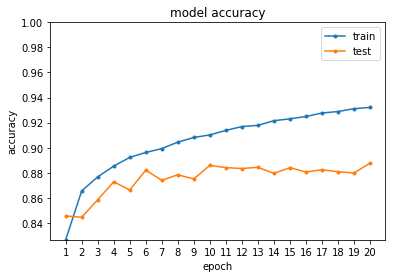

In [7]:
# 結果をプロットしてみる

e+=1
plt.figure()

plt.plot(range(1, e), history.history['acc'], marker=".")
plt.plot(range(1, e), history.history['val_acc'], marker=".")

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)

plt.xticks(range(1, e), [str(i) for i in range(1, e)])
plt.ylim(np.amin(np.append(history.history['acc'], history.history['val_acc'])), 1.0)

plt.show()

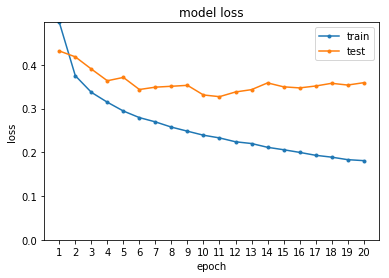

In [8]:
plt.figure()

plt.plot(range(1, e), history.history['loss'], marker=".")
plt.plot(range(1, e), history.history['val_loss'], marker=".")
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc=0)

plt.xticks(range(1, e), [str(i) for i in range(1, e)])
plt.ylim(0.0, np.amax(np.append(history.history['loss'], history.history['val_loss'])))

plt.show()

In [9]:
exit()